---
## Load Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
import kagglehub
import os

# Download the dataset
path = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")

# Find the CSV file in the downloaded folder
for file in os.listdir(path):
    if file.endswith(".csv"):
        dataset_path = os.path.join(path, file)
        break

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(dataset_path)

---
## Clean Data

No null values in the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [8]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<br>
I've renamed 'PAY_0' to 'PAY_1' to correlate with other payment months and renamed to 'defaulter' for simplicity.

In [10]:
# Rename columns
df2 = df.rename(columns={'PAY_0': 'PAY_1', 'default.payment.next.month': 'defaulter'})

df2.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'defaulter'],
      dtype='object')

In [11]:
df2['defaulter'].value_counts(normalize=True)

defaulter
0    0.7788
1    0.2212
Name: proportion, dtype: float64

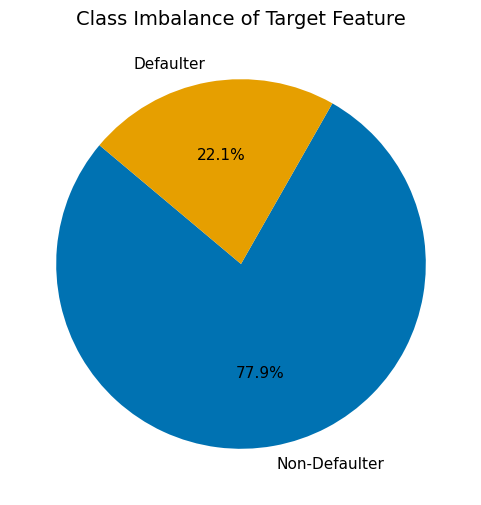

In [12]:
plt.figure(figsize=(6, 6))
plt.pie(df2['defaulter'].value_counts(normalize=True), 
        labels=['Non-Defaulter', 'Defaulter'], 
        autopct='%1.1f%%', startangle=140, 
        colors=['#0072B2', '#E69F00'], 
        textprops={'fontsize': 11})

plt.title('Class Imbalance of Target Feature', fontsize=14)
plt.savefig('class_imbalance_piechart.png', dpi=300, bbox_inches='tight')
plt.show()


<br>
There is a class imbalance for the number of people not defaulting (0) to those who are defaulting (1). Using SMOTE is one way to address this class imbalance.

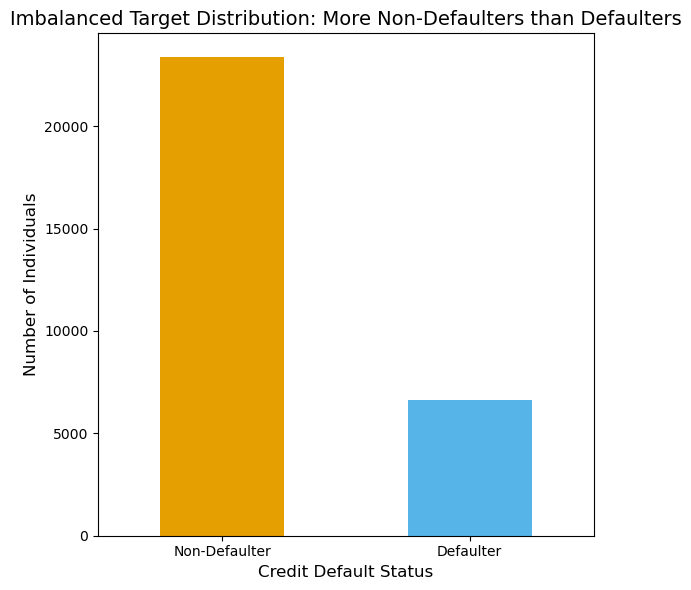

In [14]:
color_palette = ["#E69F00", "#56B4E9"]  # CUD colors or others suitable for color-blind accessibility

plt.figure(figsize=(6, 6))

ax = df2['defaulter'].value_counts().plot(kind='bar', color=color_palette)

plt.title('Imbalanced Target Distribution: More Non-Defaulters than Defaulters', fontsize=14)
plt.xlabel('Credit Default Status', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
ax.set_xticklabels(['Non-Defaulter', 'Defaulter'], rotation=0)
plt.tight_layout()  
plt.savefig('class_imbalance_bar.png', dpi=300, bbox_inches='tight')
plt.show()

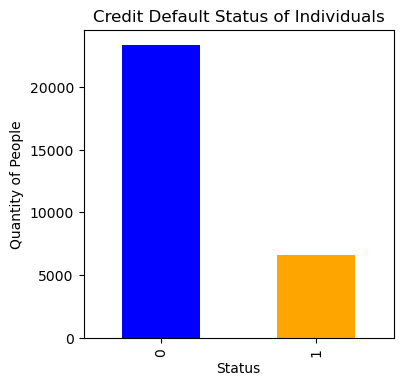

In [15]:
plt.figure(figsize=(4, 4))

ax = df2['defaulter'].value_counts().plot(kind='bar', color=['blue', 'orange'])

plt.title('Credit Default Status of Individuals')
plt.xlabel('Status')
plt.ylabel('Quantity of People')
plt.show()

In [16]:
# Drop column
df2 = df2.drop('ID', axis=1)

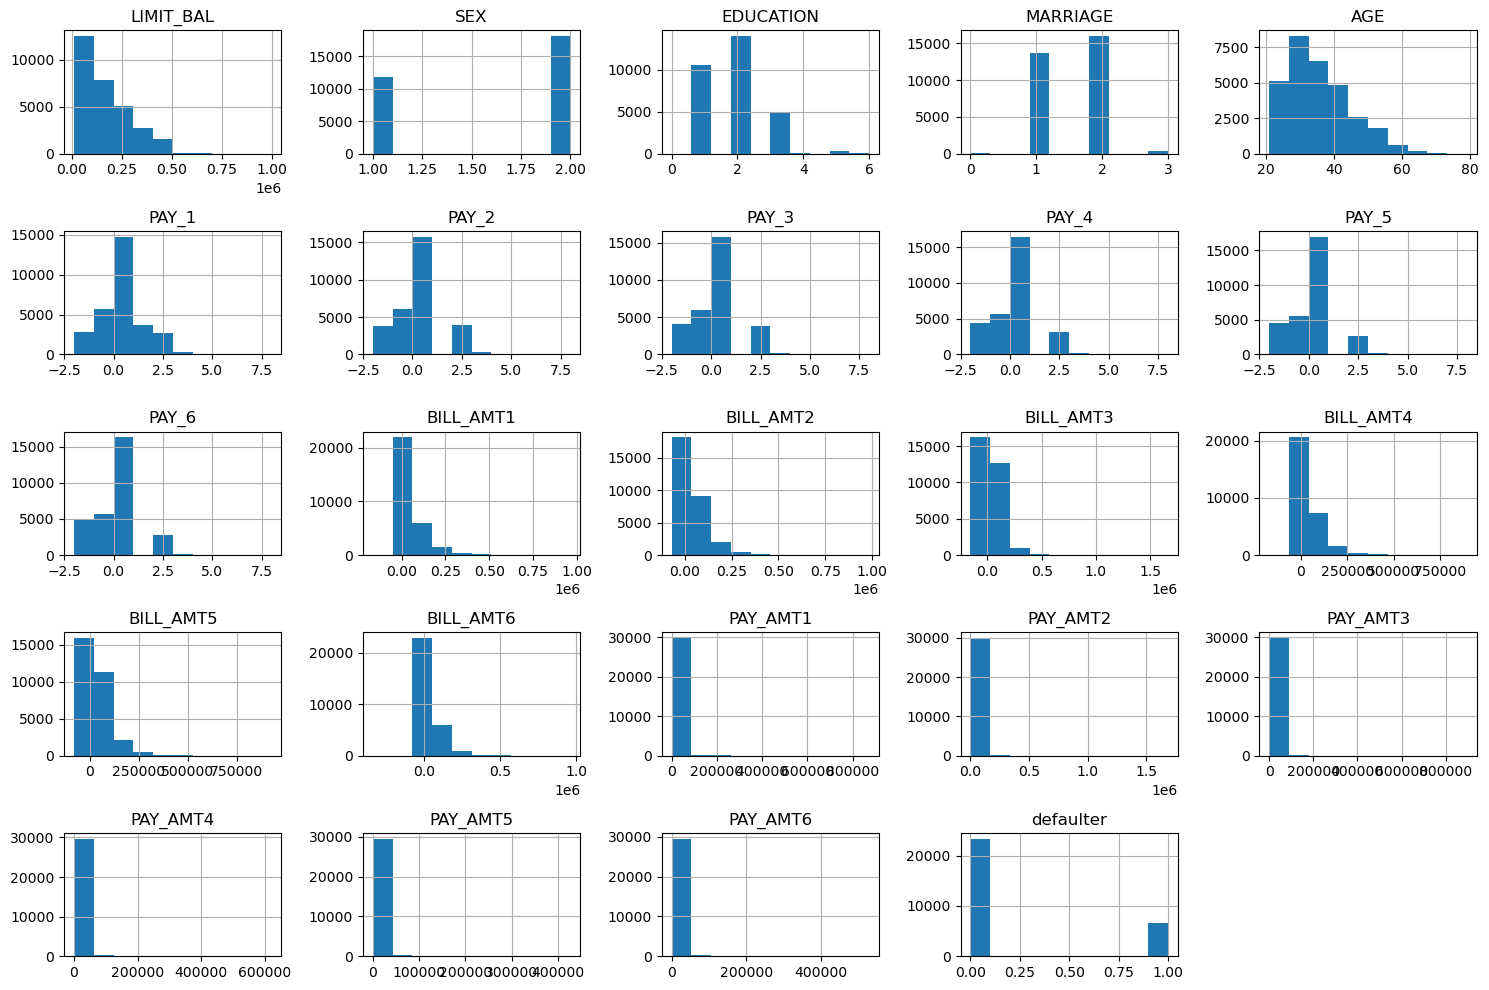

In [17]:
# PLot histogram
df2.hist(figsize=(15,10), grid=True)
plt.tight_layout() 
plt.show()

Education follows these nominal categories: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown).
In the next part, I'll consolidate the 'unknown' into one figure.

In [19]:
# Count occurances
df2['EDUCATION'].value_counts().sort_index()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: count, dtype: int64

In [20]:
# Replace column values
df2['EDUCATION'] = df2['EDUCATION'].replace({
    0:4,
    5:4,
    6:4
})

df2['EDUCATION'].value_counts().sort_index()

EDUCATION
1    10585
2    14030
3     4917
4      468
Name: count, dtype: int64

Marriage follows these nominal categories: (1=married, 2=single, 3=others). In the next part, I'll change 0 to 3 under the assumption 0=others.

In [22]:
# Count occurances
df2['MARRIAGE'].value_counts().sort_index()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: count, dtype: int64

In [23]:
# Replace column values
df2['MARRIAGE'] = df2['MARRIAGE'].replace({
    0:3
})

df2['MARRIAGE'].value_counts().sort_index()

MARRIAGE
1    13659
2    15964
3      377
Name: count, dtype: int64

<br>
No unexpected data in SEX. (1=male, 2=female)

In [25]:
# Count occurances
df2['SEX'].value_counts().sort_index()

SEX
1    11888
2    18112
Name: count, dtype: int64

<br>
No outliers in age figures.

In [27]:
# Find minimum and maximum age
age_min = df2['AGE'].min()
age_max = df2['AGE'].max()

print(f'Minimum Age: {age_min}\nMaximum Age: {age_max}')

Minimum Age: 21
Maximum Age: 79


---
## Data Exploration

<br>
Education: Majority of people aren't defaulters, with the highest non-defaulters being those who have higher education.
Marriage: Similar amounts of defaulters for married and singles, but higher non-defaulters for singles. Likely due to ~2000 more in single samples.
Sex: More females than male in the sample. By proportions, men are defaulting ~3% more than women.

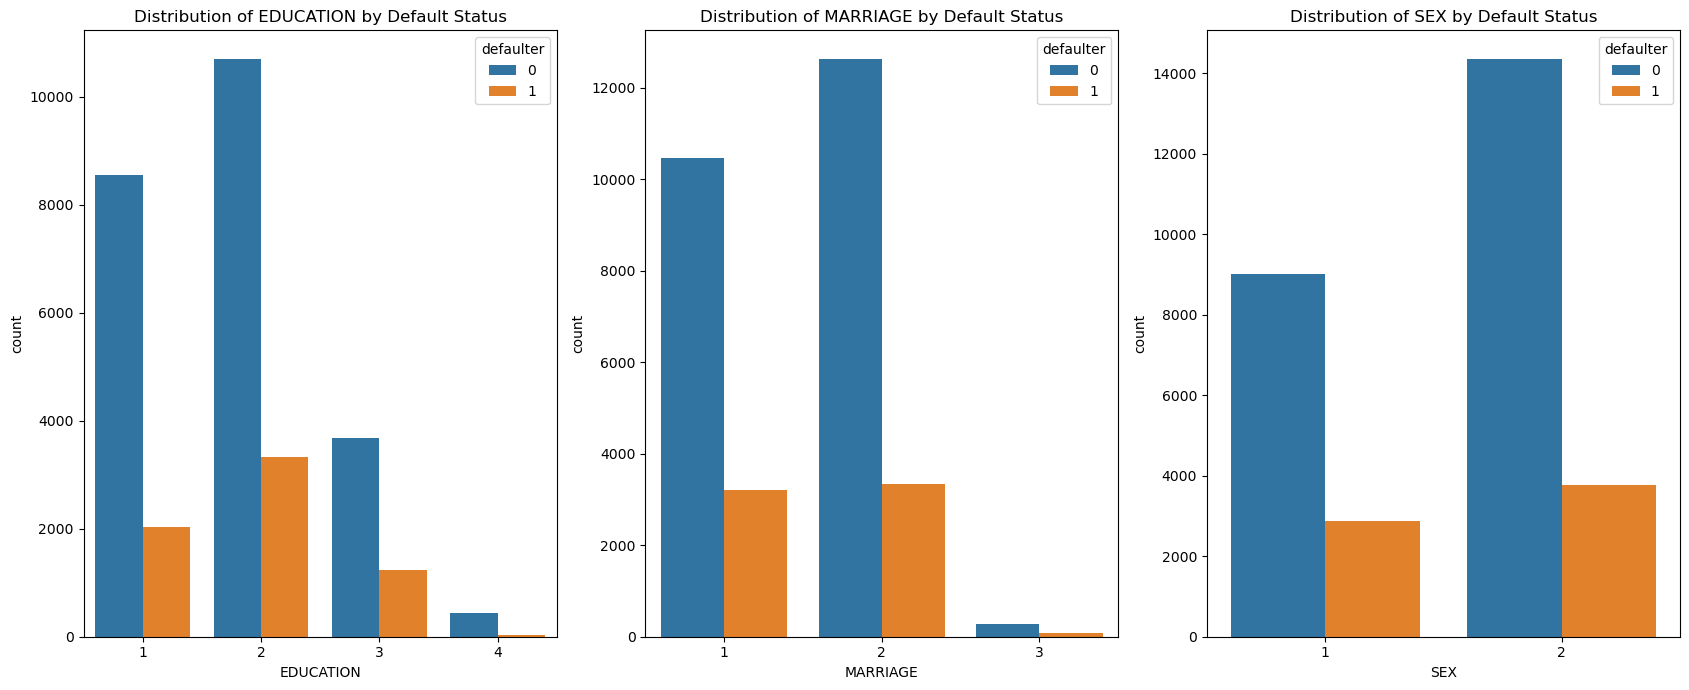

In [30]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 7))  
axes = axes.flatten()  

# Loop through features and create count plots
for i, feature in enumerate(['EDUCATION', 'MARRIAGE', 'SEX']):
    sns.countplot(data=df2, x=feature, hue='defaulter', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Default Status')


plt.tight_layout()
plt.show()

In [31]:
# Group sex and defaulters to find proportions
df2.groupby('SEX')['defaulter'].value_counts(normalize=True)

SEX  defaulter
1    0            0.758328
     1            0.241672
2    0            0.792237
     1            0.207763
Name: proportion, dtype: float64

In [32]:
# Lists of categorical and continuous features
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE', 
                        'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
continuous_features = ['LIMIT_BAL', 'AGE', 
                       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [33]:
from sklearn.preprocessing import StandardScaler

<br>
From the heatmap of categorical features, PAY_1 has the strongest correlation with defaulter of 0.32 - This is still a rather weak positite correlation.

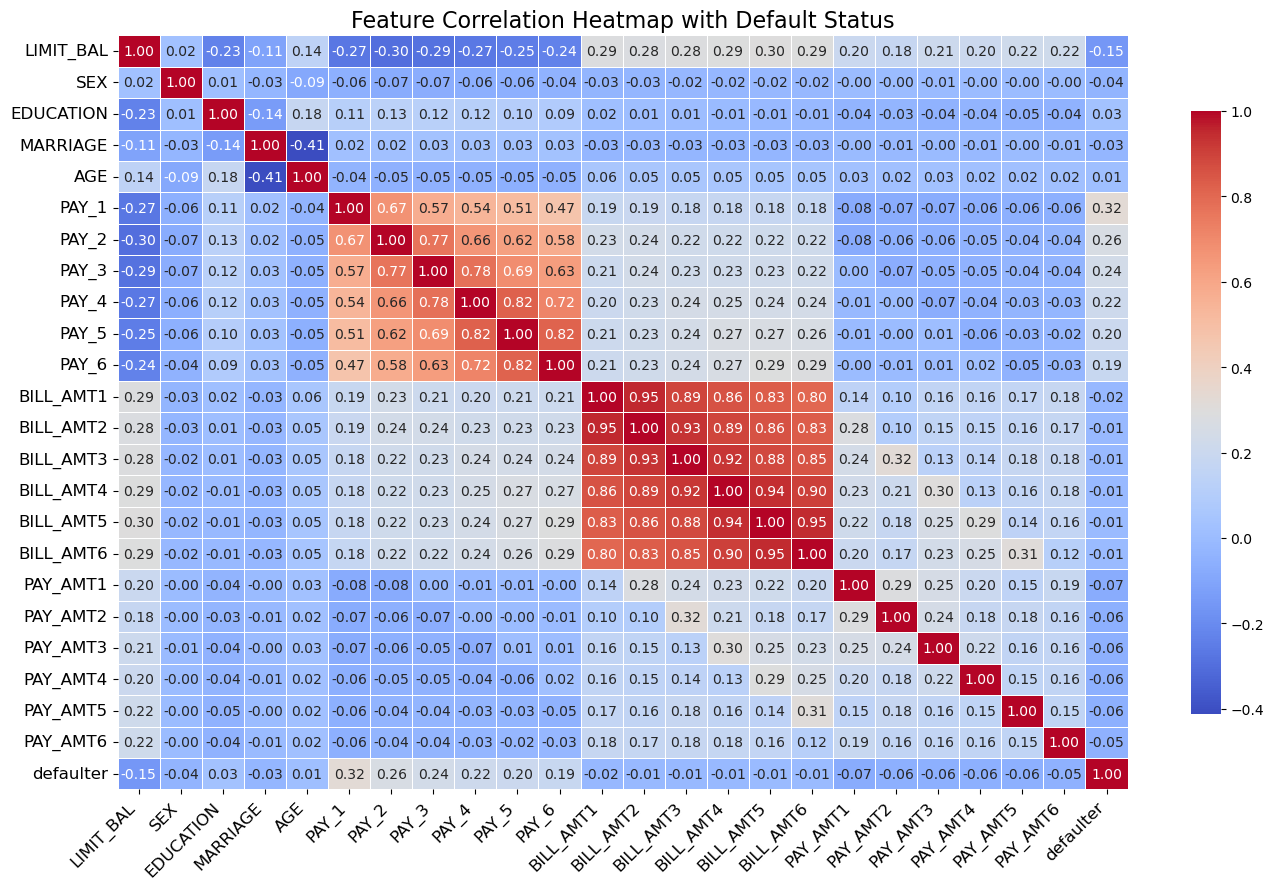

In [35]:
# Feature list
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
            'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'defaulter']

# Standardize the features before calculating the correlation
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df2[features])

# Compute the correlation matrix of the scaled data
corr_matrix = pd.DataFrame(scaled_features, columns=features).corr()

# Plot the heatmap with adjusted settings for better fit
plt.figure(figsize=(14, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            annot_kws={"size": 10}, cbar_kws={'shrink': 0.8})  

plt.title("Feature Correlation Heatmap with Default Status", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, ha='right', fontsize=12)
plt.tight_layout()  
plt.show()

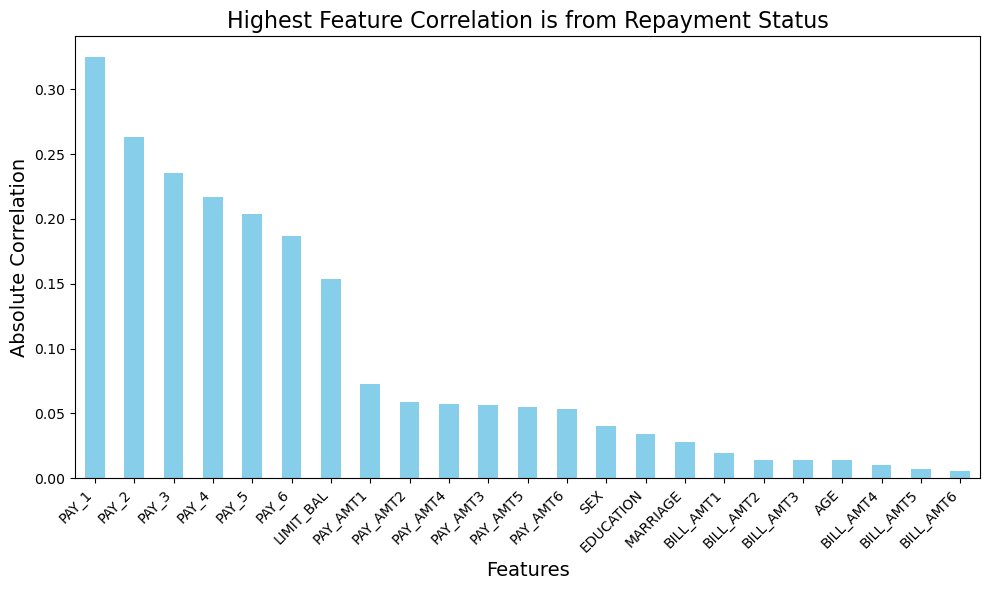

In [36]:
corr = df2.corr()  

corr_abs = np.abs(corr['defaulter']).drop('defaulter').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
corr_abs.plot(kind='bar', color='skyblue')
plt.title("Highest Feature Correlation is from Repayment Status", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Absolute Correlation", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

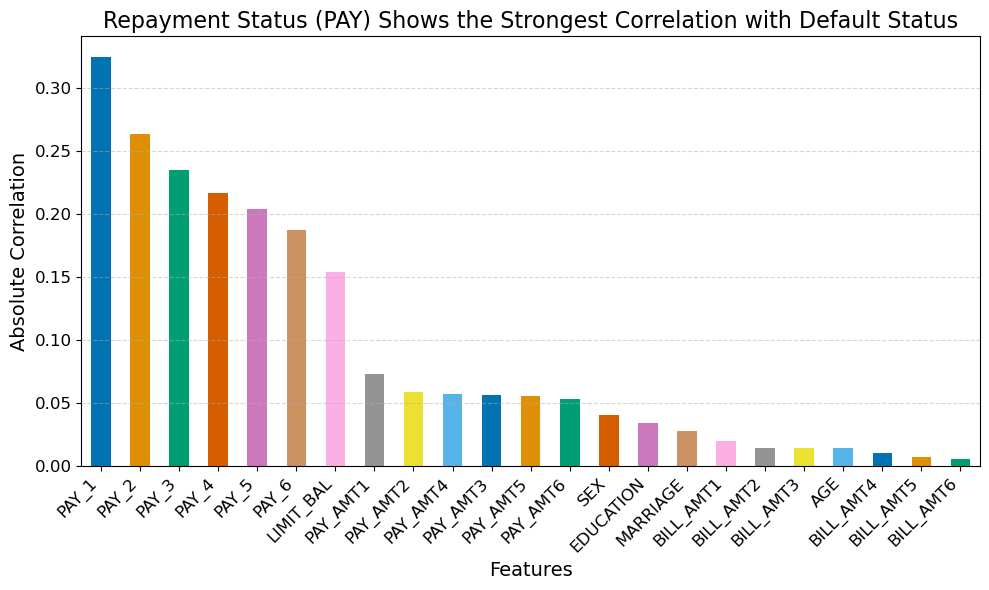

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the correlation
corr = df2.corr()  
corr_abs = np.abs(corr['defaulter']).drop('defaulter').sort_values(ascending=False)
#corr_abs = corr_abs[corr_abs > 0.1]
# Set up the figure
plt.figure(figsize=(10, 6))

# Use a color palette that is colorblind-friendly (similar to 'colorblind' from seaborn)
sns.set_palette("colorblind")

# Plot the bar chart
corr_abs.plot(kind='bar', color=sns.color_palette("colorblind", n_colors=len(corr_abs)))

# Title and axis labels with larger font size
plt.title("Repayment Status (PAY) Shows the Strongest Correlation with Default Status", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Absolute Correlation", fontsize=14)

# Customize the tick labels
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Gridlines with dashed style
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Adjust layout to ensure everything fits
plt.tight_layout()
plt.savefig('feature_correlation_bar.png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()


---
## Pre-Processing Data

In [39]:
# Copy the dataframe
df3 = df2.copy()

In [40]:
len(df3.columns)

24

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [42]:
# Assign X and y
X = df3.drop('defaulter', axis=1)
y = df3['defaulter']

In [43]:
# Split data in train/validation/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 22500 samples
Test set: 7500 samples


In [44]:
# Scale the continuous data for each dataset
scaler = StandardScaler()

X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

print(X_train.shape) 
print(X_test.shape)

(22500, 23)
(7500, 23)


In [45]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE on training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(X_train_smote.shape)
print(y_train_smote.shape)

(35046, 23)
(35046,)


In [46]:
print(pd.Series(y_train_smote).value_counts())

defaulter
1    17523
0    17523
Name: count, dtype: int64


#### Archive

Left as raw format as encoding may not be needed as the categorical features are already in integer format

OneHotEncoding has increased the features from 23 to 87

---
## Model Comparison Dataframe

In [51]:
model_comparison = pd.DataFrame(columns=['Model', 'SMOTE', 
                                         'Train Score', 'Test Score', 
                                         'Train Precision', 'Test Precision',
                                         'Train Recall', 'Test Recall'])

In [52]:
def add_to_model_comparison(model_comparison, model, smote, train_score, test_score, train_precision, test_precision, train_recall, test_recall):
    new_row = {
        "Model": model, 
        "SMOTE": smote,  
        "Train Score": train_score, 
        "Test Score": test_score, 
        "Train Precision": train_precision, 
        "Test Precision": test_precision, 
        "Train Recall": train_recall, 
        "Test Recall": test_recall
    }

    new_row = {key: value for key, value in new_row.items() if pd.notna(value)}
    model_comparison.loc[len(model_comparison)] = new_row
    model_comparison = model_comparison.drop_duplicates()
    model_comparison.sort_values(by='Model', inplace=True)
    model_comparison.reset_index(drop=True, inplace=True)

    return model_comparison

---
## Dummy Classifier

### Normal Dataset

In [55]:
from sklearn.dummy import DummyClassifier

In [56]:
dummy = DummyClassifier(strategy='stratified', random_state=42)

In [57]:
dummy.fit(X_train, y_train)

y_pred_tr = dummy.predict(X_train)
y_pred_te = dummy.predict(X_test)

In [58]:
# Compute Metrics
Xtr_acc = accuracy_score(y_train, y_pred_tr)
Xtr_pre = precision_score(y_train, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

Train Accuracy:  0.6531
Train Precision: 0.2171
Train Recall:    0.2180
------------------------------
Test Accuracy:   0.6537
Test Precision:  0.2144
Test Recall:     0.2122


In [59]:
model_comparison = add_to_model_comparison(model_comparison, 'DummyClassifier', 0, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

model_comparison

,Model,SMOTE,Train Score,Test Score,Train Precision,Test Precision,Train Recall,Test Recall
0,DummyClassifier,0,0.653111,0.653733,0.217087,0.214373,0.218003,0.212176


In [60]:
cmat_tr = confusion_matrix(y_train, dummy.predict(X_train))
cmat_te = confusion_matrix(y_test, dummy.predict(X_test))

labels = ["Non-Defaulter", "Defaulter"]

train_display = ConfusionMatrixDisplay(cmat_tr, display_labels=labels)
test_display = ConfusionMatrixDisplay(cmat_te, display_labels=labels)

# Plot
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

train_display.plot(ax=ax[0], colorbar=False)
ax[0].set_title('Dummy Classifier - Train Set\n')

test_display.plot(ax=ax[1], colorbar=False)
ax[1].set_title('Dummy Classifier - Test Set\n')

plt.show()


NameError: name 'confusion_matrix' is not defined

### SMOTE Dataset

In [ ]:
dummy2 = DummyClassifier(strategy='stratified', random_state=42)

In [ ]:
dummy2.fit(X_train_smote, y_train_smote)

y_pred_tr = dummy2.predict(X_train_smote)
y_pred_te = dummy2.predict(X_test)

In [ ]:
# Compute Metrics
Xtr_acc = accuracy_score(y_train_smote, y_pred_tr)
Xtr_pre = precision_score(y_train_smote, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train_smote, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

model_comparison = add_to_model_comparison(model_comparison, 'DummyClassifier', 1, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

In [ ]:
cmat_te = confusion_matrix(y_test, dummy2.predict(X_test))

# Custom labels
labels = ["Non-Defaulter", "Defaulter"]

test_display = ConfusionMatrixDisplay(cmat_te, display_labels=labels)

sns.set_palette("colorblind")

# Plot
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(figsize=(10, 4)) 

test_display.plot(ax=ax, colorbar=False)  
ax.set_title('Confusion Matrix: Dummy Classifier* Test Dataset\n')
plt.savefig('conf_matrix_dummy_smote.png', dpi=300, bbox_inches='tight')
plt.show()

---
## XGBoost

### Basic Model

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb

#### Normal Dataset

In [ ]:
xgb_model1 = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42
)

In [ ]:
xgb_model1.fit(X_train, y_train)

y_pred_tr = xgb_model1.predict(X_train)
y_pred_te = xgb_model1.predict(X_test)

In [ ]:
# Compute Metrics
Xtr_acc = accuracy_score(y_train, y_pred_tr)
Xtr_pre = precision_score(y_train, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

In [ ]:
model_comparison = add_to_model_comparison(model_comparison, 'XGBoost1', 0, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

model_comparison

#### SMOTE Dataset

In [ ]:
xgb_model2 = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42
)

In [ ]:
xgb_model2.fit(X_train_smote, y_train_smote)

y_pred_tr = xgb_model2.predict(X_train_smote)
y_pred_te = xgb_model2.predict(X_test)

In [ ]:
# Compute Metrics
Xtr_acc = accuracy_score(y_train_smote, y_pred_tr)
Xtr_pre = precision_score(y_train_smote, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train_smote, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

In [ ]:
model_comparison = add_to_model_comparison(model_comparison, 'XGBoost2', 1, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

### Tuned Model

#### Normal Dataset

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

Cell below converted to Raw type due to processing time. Output saved for model use in `best_params`.

In [ ]:
best_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

xgb_model3 = xgb.XGBClassifier(objective='binary:logistic', **best_params, random_state=42)
xgb_model3.fit(X_train, y_train)

y_pred_tr = xgb_model3.predict(X_train)
y_pred_te = xgb_model3.predict(X_test)

In [ ]:
# Compute Metrics
Xtr_acc = accuracy_score(y_train, y_pred_tr)
Xtr_pre = precision_score(y_train, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

In [ ]:
model_comparison = add_to_model_comparison(model_comparison, 'XGBoost3', 0, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

---
Now focusing on **XGBoost3**, I'm looking at further parameters to increase the scores as this is the best performing model so far.

In [ ]:
best_params = {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 50, 'scale_pos_weight': 1}

xgb4 = xgb.XGBClassifier(**best_params, random_state=42)
xgb4.fit(X_train, y_train)

y_pred_tr = xgb4.predict(X_train)
y_pred_te = xgb4.predict(X_test)

In [ ]:
# Compute Metrics
Xtr_acc = accuracy_score(y_train, y_pred_tr)
Xtr_pre = precision_score(y_train, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

# Add to comparison df
model_comparison = add_to_model_comparison(model_comparison, 'XGBoost4', 0, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

Test accuracy and precision have increased slightly, but recall has decreased. I'll adjust the parameters one final time to see if I can get a bit more improvement in perforamance.

In [ ]:
best_params = {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'scale_pos_weight': 1}

xgb5 = xgb.XGBClassifier(**best_params, random_state=42)
xgb5.fit(X_train, y_train)

y_pred_tr = xgb5.predict(X_train)
y_pred_te = xgb5.predict(X_test)

In [ ]:
# Compute Metrics
Xtr_acc = accuracy_score(y_train, y_pred_tr)
Xtr_pre = precision_score(y_train, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

# Add to comparison df
model_comparison = add_to_model_comparison(model_comparison, 'XGBoost5', 0, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

These parameters show improvement from XBG4 to XBG5. Will now adjust the parameters in an attempt to increase recall further.

In [ ]:
best_params = {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 100, 'scale_pos_weight': 3}

xgb6 = xgb.XGBClassifier(**best_params, random_state=42)
xgb6.fit(X_train, y_train)

y_pred_tr = xgb6.predict(X_train)
y_pred_te = xgb6.predict(X_test)

In [ ]:
# Compute Metrics
Xtr_acc = accuracy_score(y_train, y_pred_tr)
Xtr_pre = precision_score(y_train, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

# Add to comparison df
model_comparison = add_to_model_comparison(model_comparison, 'XGBoost6', 0, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob_tr = xgb6.predict_proba(X_train)[:, 1]
y_prob_te = xgb6.predict_proba(X_test)[:, 1]

fpr_tr, tpr_tr, _ = roc_curve(y_train, y_prob_tr)
fpr_te, tpr_te, _ = roc_curve(y_test, y_prob_te)

roc_auc_tr = auc(fpr_tr, tpr_tr)
roc_auc_te = auc(fpr_te, tpr_te)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_tr, tpr_tr, color='blue', lw=2, label=f'Train ROC curve (AUC = {roc_auc_tr:.2f})')
plt.plot(fpr_te, tpr_te, color='red', lw=2, label=f'Test ROC curve (AUC = {roc_auc_te:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Strong Generalisation with Minimal Overfitting on ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.savefig('xgb_model_roc.png', dpi=300, bbox_inches='tight')
plt.show()

##### Feature Importance of XGBoost6

In [ ]:
feature_importance = xgb6.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

In [ ]:
importance = xgb6.feature_importances_

feature_names = X_train.columns  
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(16, 10))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='dodgerblue')

offset = 0.001
for bar in bars:
    plt.text(bar.get_width() + offset, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.3f}', 
             va='center', ha='left', fontsize=12, color='black')

plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Best Model: XGBoost Feature Importance', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('xgboot_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

y_prob = xgb6.predict_proba(X_test)[:, 1]  

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.fill_between(recall, precision, alpha=0.2, color='lightblue')

plt.title(f'XGBoost Precision-Recall Curve', fontsize=14)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('xgboot_precision_recall_curve.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

y_prob = xgb6.predict_proba(X_test)[:, 1]  

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Test Precision and Recall values
test_precision = 0.5113
test_recall = 0.5588

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall Curve')
plt.fill_between(recall, precision, alpha=0.2, color='lightblue')

# Add Test Precision (Horizontal Line) and Test Recall (Vertical Line)
plt.axhline(y=test_precision, color='green', linestyle='--', label=f'Test Precision: {test_precision:.2f}')
plt.axvline(x=test_recall, color='red', linestyle='--', label=f'Test Recall: {test_recall:.2f}')

# Annotate the intersection point
plt.scatter(test_recall, test_precision, color='black', zorder=3)
#plt.text(test_recall, test_precision, f'  ({test_recall:.4f}, {test_precision:.4f})', 
         #verticalalignment='bottom', horizontalalignment='left', fontsize=12, color='black')

# Labels and Formatting
plt.title('XGBoost Precision-Recall Curve', fontsize=14)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()

plt.savefig('xgboost_precision_recall_curve.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
cmat_tr = confusion_matrix(xgb6.predict(X_train), y_train)
cmat_te = confusion_matrix(xgb6.predict(X_test), y_test)

train_display = ConfusionMatrixDisplay(cmat_tr, display_labels=y_train.unique().tolist())
test_display = ConfusionMatrixDisplay(cmat_te, display_labels=y_train.unique().tolist())

plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

train_display.plot(ax = ax[0], colorbar = False)
ax[0].set_title('XGBClassifier7 - Train\n')

test_display.plot(ax = ax[1], colorbar = False)
ax[1].set_title('XGBClassifier7 - Test\n')

plt.show()

In [ ]:
cmat_tr = confusion_matrix(y_train, xgb6.predict(X_train))
cmat_te = confusion_matrix(y_test, xgb6.predict(X_test))

labels = ["Non-Defaulter", "Defaulter"]

train_display = ConfusionMatrixDisplay(cmat_tr, display_labels=labels)
test_display = ConfusionMatrixDisplay(cmat_te, display_labels=labels)

plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

train_display.plot(ax=ax[0], colorbar=False)
ax[0].set_title('XGBClassifier7 - Train Set\n')

test_display.plot(ax=ax[1], colorbar=False)
ax[1].set_title('XGBClassifier7 - Test Set\n')

plt.show()

In [ ]:
cmat_dummy = confusion_matrix(y_test, dummy.predict(X_test))
cmat_xgb = confusion_matrix(y_test, xgb6.predict(X_test))

labels = ["Non-Defaulter", "Defaulter"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

# Dummy classifier confusion matrix
dummy_display = ConfusionMatrixDisplay(cmat_dummy, display_labels=labels)
dummy_display.plot(ax=axes[0], colorbar=False)
axes[0].set_title('Dummy Classifier (SMOTE)')

# XGBoost confusion matrix
xgb_display = ConfusionMatrixDisplay(cmat_xgb, display_labels=labels)
xgb_display.plot(ax=axes[1], colorbar=False)
axes[1].set_title('XGBoost')

# Add a title summarizing the comparison
plt.suptitle('XGBoost Achieves Better Classification than Dummy Classifier (SMOTE)', fontsize=16)

plt.tight_layout()
plt.subplots_adjust(top=0.85)  
plt.savefig('conf_matrix_dummy_xgb7.png', dpi=300, bbox_inches='tight')
plt.show()

Those parameters boosted the recall, but the score and precision for test both decreased significantly. Introducing a trade-off.

In [ ]:
best_params = {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'scale_pos_weight': 2}

xgb7 = xgb.XGBClassifier(**best_params, random_state=42)
xgb7.fit(X_train, y_train)

y_pred_tr = xgb7.predict(X_train)
y_pred_te = xgb7.predict(X_test)

In [ ]:
# Compute Metrics
Xtr_acc = accuracy_score(y_train, y_pred_tr)
Xtr_pre = precision_score(y_train, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

# Add to comparison df
model_comparison = add_to_model_comparison(model_comparison, 'XGBoost7', 0, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)
model_comparison

<br>
In the next model, I'm going to find the parameters to boost recall as far as possible.

In [ ]:
best_params = {'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'scale_pos_weight': 2}

xgb8 = xgb.XGBClassifier(**best_params, random_state=42)
xgb8.fit(X_train, y_train)

y_pred_tr = xgb8.predict(X_train)
y_pred_te = xgb8.predict(X_test)

In [ ]:
# Compute Metrics
Xtr_acc = accuracy_score(y_train, y_pred_tr)
Xtr_pre = precision_score(y_train, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

# Add to comparison df
model_comparison = add_to_model_comparison(model_comparison, 'XGBoost8', 0, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)
model_comparison

That didn't perform well for recall, but it increased the score and precision.

In [ ]:
best_params = {'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 100, 'scale_pos_weight': 2}

xgb9 = xgb.XGBClassifier(**best_params, random_state=42)
xgb9.fit(X_train, y_train)

y_pred_tr = xgb9.predict(X_train)
y_pred_te = xgb9.predict(X_test)

In [ ]:
# Compute Metrics
Xtr_acc = accuracy_score(y_train, y_pred_tr)
Xtr_pre = precision_score(y_train, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

# Add to comparison df
model_comparison = add_to_model_comparison(model_comparison, 'XGBoost9', 0, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)
model_comparison

Recall has started to improve now, so it's on the right track. But nowhere near as well as Model: XGBoost in terms of best recall and balance with precision too. Accuracy score has decreased significanty, but due to the class imbalance it's not a reliable metric and an increase in recall will cause a decrease in accuracy score.

#### SMOTE Dataset

In [ ]:
best_params = {'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 100}

xgb10 = xgb.XGBClassifier(**best_params, random_state=42)
xgb10.fit(X_train_smote, y_train_smote)

y_pred_tr = xgb10.predict(X_train_smote)
y_pred_te = xgb10.predict(X_test)

In [ ]:
# Compute Metrics
Xtr_acc = accuracy_score(y_train_smote, y_pred_tr)
Xtr_pre = precision_score(y_train_smote, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train_smote, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

In [ ]:
model_comparison = add_to_model_comparison(model_comparison, 'XGBoost10', 1, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

In [ ]:
best_params = {'colsample_bytree': 0.8, 'learning_rate': 0.3, 'max_depth': 5, 
               'min_child_weight': 1, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.8}

xgb11 = xgb.XGBClassifier(**best_params, random_state=42)
xgb11.fit(X_train_smote, y_train_smote)

y_pred_tr = xgb11.predict(X_train_smote)
y_pred_te = xgb11.predict(X_test)

In [ ]:
# Compute Metrics
Xtr_acc = accuracy_score(y_train_smote, y_pred_tr)
Xtr_pre = precision_score(y_train_smote, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train_smote, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

In [ ]:
model_comparison = add_to_model_comparison(model_comparison, 'XGBoost11', 1, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

model_comparison

It looks like with the SMOTE data, the models are performing much better on the train data and worse in the test data in comparison to the normal data. This suggests overfitting.

In [ ]:
best_params = {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 150, 'scale_pos_weight': 1}

xgb12 = xgb.XGBClassifier(**best_params, random_state=42)
xgb12.fit(X_train_smote, y_train_smote)

y_pred_tr = xgb12.predict(X_train_smote)
y_pred_te = xgb12.predict(X_test)

In [ ]:
# Compute Metrics
Xtr_acc = accuracy_score(y_train_smote, y_pred_tr)
Xtr_pre = precision_score(y_train_smote, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train_smote, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

# Add to comparison df
model_comparison = add_to_model_comparison(model_comparison, 'XGBoost12', 1, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

In [ ]:
best_params = {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'scale_pos_weight': 1}

xgb13 = xgb.XGBClassifier(**best_params, random_state=42)
xgb13.fit(X_train_smote, y_train_smote)

y_pred_tr = xgb13.predict(X_train_smote)
y_pred_te = xgb13.predict(X_test)

In [ ]:
# Compute Metrics
Xtr_acc = accuracy_score(y_train_smote, y_pred_tr)
Xtr_pre = precision_score(y_train_smote, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train_smote, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

# Add to comparison df
model_comparison = add_to_model_comparison(model_comparison, 'XGBoost13', 1, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

In [ ]:
best_params = {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 150, 'scale_pos_weight': 3}

xgb15 = xgb.XGBClassifier(**best_params, random_state=42)
xgb15.fit(X_train_smote, y_train_smote)

y_pred_tr = xgb15.predict(X_train_smote)
y_pred_te = xgb15.predict(X_test)

In [ ]:
# Compute Metrics
Xtr_acc = accuracy_score(y_train_smote, y_pred_tr)
Xtr_pre = precision_score(y_train_smote, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train_smote, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

# Add to comparison df
model_comparison = add_to_model_comparison(model_comparison, 'XGBoost15', 1, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

In [ ]:
cmat_tr = confusion_matrix(y_train, xgb15.predict(X_train))
cmat_te = confusion_matrix(y_test, xgb15.predict(X_test))

labels = ["Non-Defaulter", "Defaulter"]

train_display = ConfusionMatrixDisplay(cmat_tr, display_labels=labels)
test_display = ConfusionMatrixDisplay(cmat_te, display_labels=labels)

# Plot
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

train_display.plot(ax=ax[0], colorbar=False)
ax[0].set_title('XGBClassifier15 - Train Set\n')

test_display.plot(ax=ax[1], colorbar=False)
ax[1].set_title('XGBClassifier15 - Test Set\n')

plt.show()


In [ ]:
# Combined with the Dummy Classifier

cmat_dummy = confusion_matrix(y_test, dummy.predict(X_test))
cmat_xgb15 = confusion_matrix(y_test, xgb15.predict(X_test))

labels = ["Non-Defaulter", "Defaulter"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

dummy_display = ConfusionMatrixDisplay(cmat_dummy, display_labels=labels)
dummy_display.plot(ax=axes[0], colorbar=False)
axes[0].set_title('Confusion Matrix: Dummy Classifier Test Dataset')

xgb_display = ConfusionMatrixDisplay(cmat_xgb15, display_labels=labels)
xgb_display.plot(ax=axes[1], colorbar=False)
axes[1].set_title('Confusion Matrix: XGBoost (2) Test Dataset')

plt.tight_layout()
plt.savefig('conf_matrix_dummy_xgb15.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
best_params = {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 150, 'scale_pos_weight': 2}

xgb16 = xgb.XGBClassifier(**best_params, random_state=42)
xgb16.fit(X_train_smote, y_train_smote)

y_pred_tr = xgb16.predict(X_train_smote)
y_pred_te = xgb16.predict(X_test)

In [ ]:
# Compute Metrics
Xtr_acc = accuracy_score(y_train_smote, y_pred_tr)
Xtr_pre = precision_score(y_train_smote, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train_smote, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

# Add to comparison df
model_comparison = add_to_model_comparison(model_comparison, 'XGBoost16', 1, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

In [ ]:
best_params = {'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 300, 'scale_pos_weight': 2}

xgb17 = xgb.XGBClassifier(**best_params, random_state=42)
xgb17.fit(X_train_smote, y_train_smote)

y_pred_tr = xgb17.predict(X_train_smote)
y_pred_te = xgb17.predict(X_test)

In [ ]:
# Compute Metrics
Xtr_acc = accuracy_score(y_train_smote, y_pred_tr)
Xtr_pre = precision_score(y_train_smote, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train_smote, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

# Add to comparison df
model_comparison = add_to_model_comparison(model_comparison, 'XGBoost17', 1, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

In [ ]:
best_params = {'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 200, 'scale_pos_weight': 2}

xgb18 = xgb.XGBClassifier(**best_params, random_state=42)
xgb18.fit(X_train_smote, y_train_smote)

y_pred_tr = xgb18.predict(X_train_smote)
y_pred_te = xgb18.predict(X_test)

In [ ]:
# Compute Metrics
Xtr_acc = accuracy_score(y_train_smote, y_pred_tr)
Xtr_pre = precision_score(y_train_smote, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train_smote, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

In [ ]:
model_comparison = add_to_model_comparison(model_comparison, 'XGBoost18', 1, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

---
## Random Forest

### Basic Model

#### Normal Dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
rf.fit(X_train, y_train)

y_pred_tr = rf.predict(X_train)
y_pred_te = rf.predict(X_test)

In [ ]:
# Compute Metrics
Xtr_acc = accuracy_score(y_train, y_pred_tr)
Xtr_pre = precision_score(y_train, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

model_comparison = add_to_model_comparison(model_comparison, 'RandomForest', 0, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

This random forest model massively overfits to the train data. Hyperparameter tuning will be used to reduce this.

#### SMOTE Dataset

In [ ]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train_smote, y_train_smote)

y_pred_tr = rf.predict(X_train_smote)
y_pred_te = rf.predict(X_test)

# Compute Metrics
Xtr_acc = accuracy_score(y_train_smote, y_pred_tr)
Xtr_pre = precision_score(y_train_smote, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train_smote, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

model_comparison = add_to_model_comparison(model_comparison, 'RandomForest2', 1, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

### Tuned Model

#### Normal Dataset

The below code is set as raw due to the run time. Best parameters saved in the cell below for the relevant metrics.

Accuracy and precision have the same parameters. Recall and F1 have the same parameters.

In [ ]:
best_acc_params = {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
best_reca_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

In [ ]:
# Model
rf3 = RandomForestClassifier(**best_acc_params, random_state=42)
rf3.fit(X_train, y_train)

# Predictions
y_pred_tr = rf3.predict(X_train)
y_pred_te = rf3.predict(X_test)

# Compute Metrics
Xtr_acc = accuracy_score(y_train, y_pred_tr)
Xtr_pre = precision_score(y_train, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

# Add metrics to dataframe
model_comparison = add_to_model_comparison(model_comparison, 'RandomForest3', 0, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

In [ ]:
# Model
rf4 = RandomForestClassifier(**best_reca_params, random_state=42)
rf4.fit(X_train, y_train)

# Predictions
y_pred_tr = rf4.predict(X_train)
y_pred_te = rf4.predict(X_test)

# Compute Metrics
Xtr_acc = accuracy_score(y_train, y_pred_tr)
Xtr_pre = precision_score(y_train, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

# Add metrics to dataframe
model_comparison = add_to_model_comparison(model_comparison, 'RandomForest4', 0, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

#### SMOTE Dataset

The below code is set as raw due to the run time. Best parameters saved below under `best_params`.

The best parameters are all the same for the metrics.

In [ ]:
best_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

In [ ]:
# Model
rf5 = RandomForestClassifier(**best_params, random_state=42)
rf5.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_tr = rf5.predict(X_train_smote)
y_pred_te = rf5.predict(X_test)

# Compute Metrics
Xtr_acc = accuracy_score(y_train_smote, y_pred_tr)
Xtr_pre = precision_score(y_train_smote, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train_smote, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

# Add metrics to dataframe
model_comparison = add_to_model_comparison(model_comparison, 'RandomForest5', 1, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

<br>


The `best_tested_params` is the output of manually adjusting parameters and reviewing the test metrics.

In [ ]:
best_tested_params = {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}

In [ ]:
# Model
rf6 = RandomForestClassifier(**best_tested_params, random_state=42)
rf6.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_tr = rf6.predict(X_train_smote)
y_pred_te = rf6.predict(X_test)

# Compute Metrics
Xtr_acc = accuracy_score(y_train_smote, y_pred_tr)
Xtr_pre = precision_score(y_train_smote, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train_smote, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

# Add metrics to dataframe
model_comparison = add_to_model_comparison(model_comparison, 'RandomForest6', 1, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

---
## KNN

### Basic Model

#### Normal Dataset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

# Predictions
y_pred_tr = knn.predict(X_train)
y_pred_te = knn.predict(X_test)

# Compute Metrics
Xtr_acc = accuracy_score(y_train, y_pred_tr)
Xtr_pre = precision_score(y_train, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

# Add metrics to dataframe
model_comparison = add_to_model_comparison(model_comparison, 'KNN', 0, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

#### SMOTE Dataset

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_tr = knn.predict(X_train_smote)
y_pred_te = knn.predict(X_test)

# Compute Metrics
Xtr_acc = accuracy_score(y_train_smote, y_pred_tr)
Xtr_pre = precision_score(y_train_smote, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train_smote, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

# Add metrics to dataframe
model_comparison = add_to_model_comparison(model_comparison, 'KNN2', 1, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

### Tuned Model

#### Normal Dataset

In [ ]:
best_params_acc = {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
best_params_f1 = {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
best_params_pre = {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
best_params_rec = {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}

In [ ]:
knn_best_params = [best_params_acc, best_params_f1, best_params_pre, best_params_rec]

counter = 3

for params in knn_best_params:
    knn = KNeighborsClassifier(**params)
    knn.fit(X_train, y_train)
    
    y_pred_tr = knn.predict(X_train)
    y_pred_te = knn.predict(X_test)

    # Compute Metrics
    Xtr_acc = accuracy_score(y_train, y_pred_tr)
    Xtr_pre = precision_score(y_train, y_pred_tr, zero_division=1)  # Avoids warning
    Xtr_rec = recall_score(y_train, y_pred_tr)
    
    Xte_acc = accuracy_score(y_test, y_pred_te)
    Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
    Xte_rec = recall_score(y_test, y_pred_te)

    # Start at KNN2
    model_name = f'KNN{counter}'
    counter += 1
    
    # Add metrics to dataframe
    model_comparison = add_to_model_comparison(model_comparison, model_name, 0, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

#### SMOTE Dataset

In [ ]:
best_params = {
    'accuracy': {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'},
    'precision': {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'},
    'recall': {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'},
    'f1': {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
}

In [ ]:
counter = 7

for score in best_params:
    params = best_params[score]  
    
    knn = KNeighborsClassifier(**params)
    knn.fit(X_train_smote, y_train_smote)
    
    # Predictions
    y_pred_tr = knn.predict(X_train_smote)
    y_pred_te = knn.predict(X_test)

    # Compute Metrics
    Xtr_acc = accuracy_score(y_train_smote, y_pred_tr)
    Xtr_pre = precision_score(y_train_smote, y_pred_tr, zero_division=1)  # Avoids warning
    Xtr_rec = recall_score(y_train_smote, y_pred_tr)
    
    Xte_acc = accuracy_score(y_test, y_pred_te)
    Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
    Xte_rec = recall_score(y_test, y_pred_te)

    # Start at 6
    model_name = f'KNN{counter}'
    counter += 1
    
    # Add metrics to dataframe
    model_comparison = add_to_model_comparison(model_comparison, model_name, 1, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

---
## Logistic Regression

### Basic Model

#### Normal Dataset

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression(random_state=42)

log_model.fit(X_train, y_train)

y_pred_tr = log_model.predict(X_train)
y_pred_te = log_model.predict(X_test)

# Compute Metrics
Xtr_acc = accuracy_score(y_train, y_pred_tr)
Xtr_pre = precision_score(y_train, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

model_comparison = add_to_model_comparison(model_comparison, 'LogisticRegression', 0, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

#### SMOTE Dataset

In [ ]:
log_model = LogisticRegression(random_state=42)

log_model.fit(X_train_smote, y_train_smote)

y_pred_tr = log_model.predict(X_train_smote)
y_pred_te = log_model.predict(X_test)

# Compute Metrics
Xtr_acc = accuracy_score(y_train_smote, y_pred_tr)
Xtr_pre = precision_score(y_train_smote, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train_smote, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

model_comparison = add_to_model_comparison(model_comparison, 'LogisticRegression2', 1, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

### Tuned Model

#### Normal Dataset

In [ ]:
# Best parameters from code output above.
best_params = {
    'accuracy': {'C': 0.001, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'},
    'precision': {'C': 0.001, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'},
    'recall': {'C': 1, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'},
    'f1': {'C': 0.001, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
}

In [ ]:
counter = 3

for score in best_params:
    params = best_params[score]  
    
    log_reg = LogisticRegression(**params, random_state=42)
    log_reg.fit(X_train, y_train)
    
    # Predictions
    y_pred_tr = log_reg.predict(X_train)
    y_pred_te = log_reg.predict(X_test)

    # Compute Metrics
    Xtr_acc = accuracy_score(y_train, y_pred_tr)
    Xtr_pre = precision_score(y_train, y_pred_tr, zero_division=1)  # Avoids warning
    Xtr_rec = recall_score(y_train, y_pred_tr)
    
    Xte_acc = accuracy_score(y_test, y_pred_te)
    Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
    Xte_rec = recall_score(y_test, y_pred_te)

    # Start at 6
    model_name = f'LogisticRegression{counter}'
    counter += 1
    
    # Add metrics to dataframe
    model_comparison = add_to_model_comparison(model_comparison, model_name, 0, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

#### SMOTE Dataset

Converted above code to raw and listed output in cell below.

In [ ]:
best_params = {
    'accuracy': {'C': 0.001, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'},
    'precision': {'C': 0.001, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'},
    'recall': {'C': 100, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'},
    'f1': {'C': 100, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
}

In [ ]:
counter = 7

for score in best_params:
    params = best_params[score]  
    
    log_reg = LogisticRegression(**params, random_state=42)
    log_reg.fit(X_train_smote, y_train_smote)
    
    # Predictions
    y_pred_tr = log_reg.predict(X_train_smote)
    y_pred_te = log_reg.predict(X_test)

    # Compute Metrics
    Xtr_acc = accuracy_score(y_train_smote, y_pred_tr)
    Xtr_pre = precision_score(y_train_smote, y_pred_tr, zero_division=1)  # Avoids warning
    Xtr_rec = recall_score(y_train_smote, y_pred_tr)
    
    Xte_acc = accuracy_score(y_test, y_pred_te)
    Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
    Xte_rec = recall_score(y_test, y_pred_te)

    # Start at 6
    model_name = f'LogisticRegression{counter}'
    counter += 1
    
    # Add metrics to dataframe
    model_comparison = add_to_model_comparison(model_comparison, model_name, 1, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

---
## Support Vector Machine (SVM)

### Basic Model

#### Normal Dataset

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC(random_state=42)

svc_model.fit(X_train, y_train)

y_pred_tr = svc_model.predict(X_train)
y_pred_te = svc_model.predict(X_test)

# Compute Metrics
Xtr_acc = accuracy_score(y_train, y_pred_tr)
Xtr_pre = precision_score(y_train, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

model_comparison = add_to_model_comparison(model_comparison, 'SVC', 0, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

#### SMOTE Dataset

In [ ]:
svc_model = SVC(random_state=42)

svc_model.fit(X_train_smote, y_train_smote)

y_pred_tr = svc_model.predict(X_train_smote)
y_pred_te = svc_model.predict(X_test)

# Compute Metrics
Xtr_acc = accuracy_score(y_train_smote, y_pred_tr)
Xtr_pre = precision_score(y_train_smote, y_pred_tr, zero_division=1)  # Avoids warning
Xtr_rec = recall_score(y_train_smote, y_pred_tr)

Xte_acc = accuracy_score(y_test, y_pred_te)
Xte_pre = precision_score(y_test, y_pred_te, zero_division=1)  # Avoids warning
Xte_rec = recall_score(y_test, y_pred_te)

# Print Metrics 
print(f"Train Accuracy:  {Xtr_acc:.4f}")
print(f"Train Precision: {Xtr_pre:.4f}")
print(f"Train Recall:    {Xtr_rec:.4f}")
print("-" * 30)
print(f"Test Accuracy:   {Xte_acc:.4f}")
print(f"Test Precision:  {Xte_pre:.4f}")
print(f"Test Recall:     {Xte_rec:.4f}")

model_comparison = add_to_model_comparison(model_comparison, 'SVC2', 1, Xtr_acc, Xte_acc, Xtr_pre, Xte_pre, Xtr_rec, Xte_rec)

---

## Model Comparison Export

In [ ]:
model_comparison